
1. Lasso Regression:
○ Lasso applies L1 regularization, which shrinks the coefficients of irrelevant
features to zero.
○ Non-zero coefficients represent the selected features. The selected features are
then used to evaluate model performance.
2. Random Forest Classifier:
○ Random Forest is used to determine feature importance. Each feature's
importance is calculated based on how much it contributes to reducing impurity in
the decision trees.
○ The feature importance scores are plotted and displayed.
3. ElasticNet Regression:
○ ElasticNet combines L1 (Lasso) and L2 (Ridge) regularization to select features.
It is useful when features are correlated.
○ The model selects features based on a balance of both regularization methods
and evaluates the selected features.


Selected Features by Lasso:
sepal width (cm)    -0.045915
petal length (cm)    0.317231
petal width (cm)     0.434843
dtype: float64

Lasso Model Accuracy with Selected Features: 0.9436

Random Forest Feature Importances:
petal width (cm)     0.433982
petal length (cm)    0.417308
sepal length (cm)    0.104105
sepal width (cm)     0.044605
dtype: float64


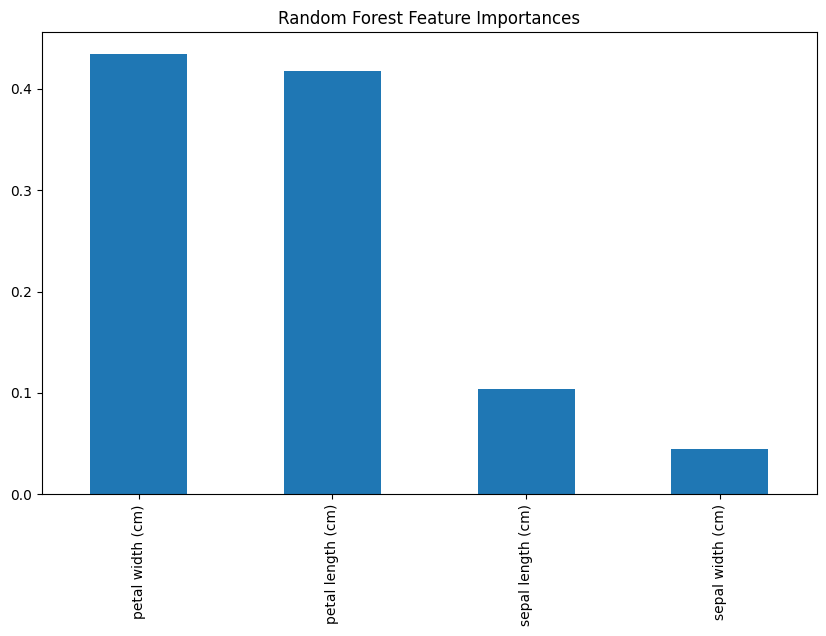

Random Forest Model Accuracy: 1.0000

Selected Features by ElasticNet:
sepal length (cm)   -0.021918
sepal width (cm)    -0.042807
petal length (cm)    0.352903
petal width (cm)     0.421898
dtype: float64

ElasticNet Model Accuracy with Selected Features: 0.9437



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------- 1. Lasso Regression -----------------
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Get coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_lasso_features = lasso_coefficients[lasso_coefficients != 0]
print("Selected Features by Lasso:")
print(selected_lasso_features)

# Filter the selected features
selected_features_mask = lasso_coefficients != 0
X_train_lasso = X_train_scaled[:, selected_features_mask]
X_test_lasso = X_test_scaled[:, selected_features_mask]

# Retrain a Lasso model with selected features
lasso_selected = Lasso(alpha=0.01)
lasso_selected.fit(X_train_lasso, y_train)

# Evaluate the new model on the test set
lasso_accuracy = lasso_selected.score(X_test_lasso, y_test)
print(f"\nLasso Model Accuracy with Selected Features: {lasso_accuracy:.4f}\n")

# ----------------- 2. Random Forest (Feature Importance) -----------------
# Apply Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(rf_feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
rf_feature_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.show()

# Predict and evaluate model performance with Random Forest
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}\n")

# ----------------- 3. ElasticNet (L1 + L2 Regularization) -----------------
# Apply ElasticNet for feature selection
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet.fit(X_train_scaled, y_train)

# Get coefficients of the features
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X.columns)
selected_elasticnet_features = elasticnet_coefficients[elasticnet_coefficients != 0]
print("Selected Features by ElasticNet:")
print(selected_elasticnet_features)

# Filter the selected features
selected_features_mask_elasticnet = elasticnet_coefficients != 0
X_train_elasticnet = X_train_scaled[:, selected_features_mask_elasticnet]
X_test_elasticnet = X_test_scaled[:, selected_features_mask_elasticnet]

# Retrain an ElasticNet model with selected features
elasticnet_selected = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet_selected.fit(X_train_elasticnet, y_train)

# Evaluate the new model on the test set
elasticnet_accuracy = elasticnet_selected.score(X_test_elasticnet, y_test)
print(f"\nElasticNet Model Accuracy with Selected Features: {elasticnet_accuracy:.4f}\n")


The selected features by Lasso are printed along with the model accuracy after feature
selection.
 Random Forest outputs feature importance values and a bar plot of feature importance.
 ElasticNet prints the selected features and the model’s performance after feature
selection.
Conclusion:
● Lasso reduces the number of features by shrinking irrelevant ones to zero.
● Random Forest provides insight into the most important features using built-in feature
importance.
● ElasticNet allows a balance between L1 and L2 regularization, making it more flexible
for selecting features, especially in datasets where features are correlated.

 **Recursive Feature Elimination with Cross-Validation (RFECV)**
This technique uses a model to recursively remove the least important features and evaluates performance at each step using cross-validation.

In [4]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

# Use a Support Vector Machine (SVM) as the base estimator
svc = SVC(kernel="linear", random_state=42)
rfecv = RFECV(estimator=svc, step=1, cv=5, scoring="accuracy")
rfecv.fit(X_train_scaled, y_train)

# Features selected by RFECV
selected_rfecv_features = X.columns[rfecv.support_]
print("Selected Features by RFECV:")
print(selected_rfecv_features)

# Evaluate model performance with selected features
X_train_rfecv = X_train_scaled[:, rfecv.support_]
X_test_rfecv = X_test_scaled[:, rfecv.support_]

svc_selected = SVC(kernel="linear", random_state=42)
svc_selected.fit(X_train_rfecv, y_train)
rfecv_accuracy = svc_selected.score(X_test_rfecv, y_test)
print(f"RFECV Model Accuracy with Selected Features: {rfecv_accuracy:.4f}")


Selected Features by RFECV:
Index(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
RFECV Model Accuracy with Selected Features: 0.9778


 **Feature Selection with Gradient Boosting (XGBoost)**
Gradient boosting models can also provide feature importance scores, which you can use to select the most influential features.

In [5]:
from xgboost import XGBClassifier

# Train an XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)

# Get feature importance scores
xgb_feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False)
print("XGBoost Feature Importances:")
print(xgb_feature_importances)

# Select top features (e.g., top 3)
top_features = xgb_feature_importances.head(3).index
X_train_xgb = X_train[top_features]
X_test_xgb = X_test[top_features]

# Retrain with selected features
xgb_selected = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb_selected.fit(X_train_xgb, y_train)
xgb_accuracy = xgb_selected.score(X_test_xgb, y_test)
print(f"XGBoost Model Accuracy with Selected Features: {xgb_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:05:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
petal length (cm)    0.738762
petal width (cm)     0.220724
sepal width (cm)     0.030385
sepal length (cm)    0.010128
dtype: float32


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:05:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy with Selected Features: 1.0000


Embedded Feature Selection with L1-Regularized Logistic Regression
Use L1 regularization to select features during logistic regression trainin

In [6]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression with L1 regularization
logreg = LogisticRegression(penalty="l1", solver="saga", C=1.0, random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Get coefficients of the features
logreg_coefficients = pd.Series(logreg.coef_[0], index=X.columns)
selected_logreg_features = logreg_coefficients[logreg_coefficients != 0]
print("Selected Features by L1-Regularized Logistic Regression:")
print(selected_logreg_features)

# Evaluate model performance with selected features
selected_features_mask_logreg = logreg_coefficients != 0
X_train_logreg = X_train_scaled[:, selected_features_mask_logreg]
X_test_logreg = X_test_scaled[:, selected_features_mask_logreg]

logreg_selected = LogisticRegression(penalty="l1", solver="saga", C=1.0, random_state=42, max_iter=1000)
logreg_selected.fit(X_train_logreg, y_train)
logreg_accuracy = logreg_selected.score(X_test_logreg, y_test)
print(f"L1-Regularized Logistic Regression Model Accuracy: {logreg_accuracy:.4f}")


Selected Features by L1-Regularized Logistic Regression:
sepal width (cm)     0.825395
petal length (cm)   -4.314534
dtype: float64
L1-Regularized Logistic Regression Model Accuracy: 1.0000
